# Interpretación de modelos e importancia de las variables

La interpretabilidad siempre es un elemento deseable de cualquier modelo de datos. Sea cual sea el objetivo, ser capaz de vincular los parámetros de un modelo aprendido con la naturaleza de los datos permite, entre otras cosas:
*   ganar conocimiento sobre el problema
*   mejorar la metodología de aprendizaje con ese conocimiento
*   diagnosticar posibles problemas de implementación

Más allá de lo anterior, que puede verse como subproductos del proceso de aprendizaje, muchas veces el modelo aprendido es un fin en sí, más que un medio. Por ejemplo, si queremos diseñar una política pública para reducir el riesgo de cáncer en la población, podemos usar el resultado de una regresión para enfocar nuestras energías en las variables que resultaron ser más relevantes.

No todos los modelos son fácilmente interpretables. Abajo veremos algunos que lo son, y algunas formas de  mejorar su interpretabilidad.

## Regresión

Como ya vimos, sea lineal o logística, la regresión vincula un conjunto de variables regresoras $X_1,X_2,\ldots,X_m$ con una variable de respuesta $y$ mediante una relación lineal: $y= \sum_{i=1}^m a_i X_i.$

En estadística clásica, los parámetros del modelo, $a_1,\ldots,a_m$ se llaman _cargas_ (loadings), denotando el peso relativo que tiene cada variable en la respuesta: claramente, mientras más grande $a_i$ (en valor absoluto), mayor su influencia en $y$; si $a_i=0$, la variable $X_i$ no incide en absoluto.

Desafortunadamente, la forma tradicional de estimar los pesos $a_1,a_2,\ldots,a_m$, el método de los _mínimos cuadrados_ no suele ser la más fiable ni la que arroja resultados más interpretables. Veamos esto en el problema de cancer de mama.

El caso que vamos a ver abajo es un problema clásico, en este caso para regresión lineal. Se trata de predecir si un tumor de mama es maligno o no en base a una serie de medidas.


In [2]:
!pip install --quiet mglearn
#
# importación
#
import mglearn

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import numpy as np
import numpy.random as rng
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['savefig.dpi'] = 150

mpl.rcParams['font.size'] = 10
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 5.0 MB/s eta 0:00:00


Datos del problema  : CANCER
numero de variables : 30
numero de muestras  : 569
LOGREG/L2   score train: 0.99 test: 0.99
LOGREG/LASSO score train: 0.99 test: 0.99


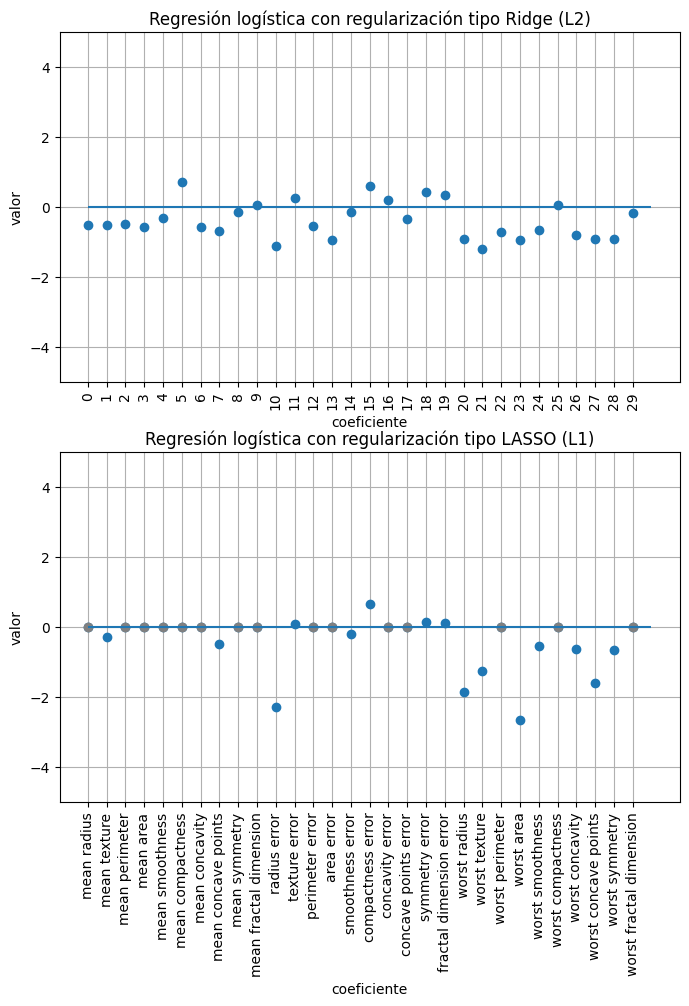

In [3]:
#
# datos del problema
#
from sklearn import datasets
cancer = datasets.load_breast_cancer()
X = cancer.data
#
# normalización;
# esta forma de preprocesar los datos que suele
# ayudar mucho, sobre todo en métodos de regresión
# mas adelante veremos mas sobre esto
#
X -= np.mean(X,axis=0)
X /= np.std(X,axis=0)

y = cancer.target

print("=====================================")
print("Datos del problema  : CANCER")
print("numero de variables :",X.shape[1])
print("numero de muestras  :",X.shape[0])
print("=====================================")
#
# dividimos en conjunto de entrenamiento y validación
#
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
#
#  Regularización tipo Ridge (L2)
#
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)
coefs_l2 = model.coef_
train_score = model.score(X_train, y_train)
test_score  = model.score(X_test, y_test)
print(f"LOGREG/L2   score train: {train_score:.2f} test: {test_score:.2f}")
#
# Regularización tipo Lasso (L1)
#
model = LogisticRegression(solver='liblinear',penalty='l1').fit(X_train, y_train)
coefs_l1 = model.coef_.ravel()
train_score = model.score(X_train, y_train)
test_score  = model.score(X_test, y_test)
print(f"LOGREG/LASSO score train: {train_score:.2f} test: {test_score:.2f}")

plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
plt.plot(coefs_l2.T,'o')
plt.hlines(0, 0, cancer.data.shape[1])
plt.xticks(range(cancer.data.shape[1]), rotation=90)
plt.grid(True)
plt.ylim(-5, 5)
plt.title('Regresión logística con regularización tipo Ridge (L2)')
plt.xlabel("coeficiente")
plt.ylabel("valor")

plt.subplot(2,1,2)
plt.plot(coefs_l1, 'o')
# pintamos los coeficientes exactamente 0  ('inactivos') de otro color:
inactivos = np.flatnonzero(coefs_l1 == 0)
plt.plot(inactivos,np.zeros(len(inactivos)),'o',color='gray')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.grid(True)
plt.ylim(-5, 5)
plt.title('Regresión logística con regularización tipo LASSO (L1)')
plt.xlabel("coeficiente")
plt.ylabel("valor")
#plt.legend()
plt.savefig('ridge_vs_lasso.png')
plt.show()

## Comentarios

Nota: podrían ser preguntas (todas o parte)

*   Los desempeños son _idénticos_
*   Pero los coeficientes obtenidos son _muy_ distintos
*   Los coeficientes del caso $\ell_2$ son todos no nulos
*   Los coeficientes del caso $\ell_1$ son en su mayoría $0$: la regresión sólo depende de unas pocas variables
*   ¿Cuál es más interpretable?

# Importancia de las variables en árboles de decisión



ARBOL score train: 0.99 test: 0.94


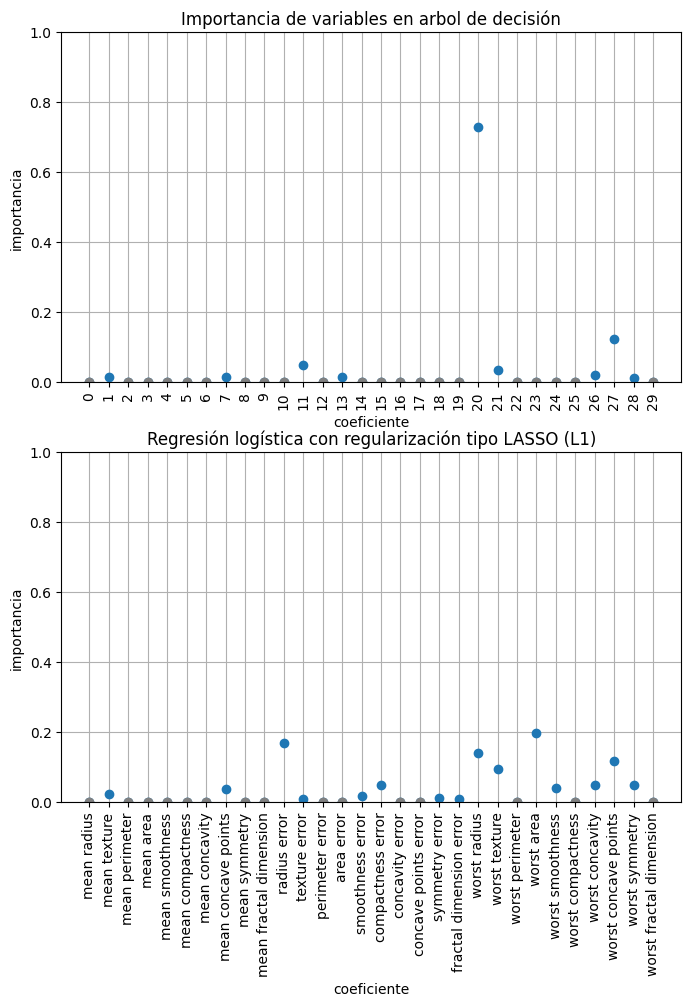

In [4]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score  = model.score(X_test, y_test)
print(f"ARBOL score train: {train_score:.2f} test: {test_score:.2f}")

#
# la importancia de cada variable se almacena aquí:
# la importancia de cada variable vale entre 0 y 1,
# siendo 0 = 'no importa' y 1 = 'determinante'
#
importances = model.feature_importances_


plt.figure(figsize=(8,10))

plt.subplot(2,1,1)
plt.plot(importances, 'o')
inactivos = np.flatnonzero(importances == 0)
plt.plot(inactivos,np.zeros(len(inactivos)),'o',color='gray')
plt.xticks(range(cancer.data.shape[1]), rotation=90)
plt.grid(True)
plt.ylim(0,1)
plt.title('Importancia de variables en arbol de decisión')
plt.xlabel("coeficiente")
plt.ylabel("importancia")

#
# improvisamos una importancia relativa para el caso de regresión logística
# usamos el valor absoluto de cada variable y dividimos todo por la suma
#
importancia_l1 = np.abs(coefs_l1)*(1/np.sum(np.abs(coefs_l1)))

plt.subplot(2,1,2)
plt.plot(importancia_l1, 'o')
inactivos = np.flatnonzero(coefs_l1 == 0)
plt.plot(inactivos,np.zeros(len(inactivos)),'o',color='gray')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(0,1)
#plt.hlines(0, 0, cancer.data.shape[1])
plt.title('Regresión logística con regularización tipo LASSO (L1)')
plt.xlabel("coeficiente")
plt.ylabel("importancia")
plt.grid(True)
#plt.legend()
plt.savefig('tree_vs_lasso.png')

plt.show()



## Discusión

En vista de la comparación de las importancias relativas de las variables usando Regresión Logística y Árboles:

*   ¿Qué tan consistentes son las importancias asignadas por ambos métodos?
*   ¿Se le ocurre alguna manera de dar significancia estadística a estas medidas?

